In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier, plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_set = pd.read_csv('train_norus.csv')
train_res_set = pd.read_csv('train_rus03.csv')
test_set = pd.read_csv('test_set.csv')

In [4]:
train_res_set.info()
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19578 entries, 0 to 19577
Columns: 453 entries, height to k2q31a
dtypes: float64(408), int64(45)
memory usage: 67.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43799 entries, 0 to 43798
Columns: 453 entries, height to k2q31a
dtypes: float64(408), int64(45)
memory usage: 151.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Columns: 453 entries, height to k2q31a
dtypes: float64(408), int64(45)
memory usage: 37.8 MB


In [3]:
X_train = train_set.drop(columns=['k2q31a'])
y_train = train_set['k2q31a']

X_trainrus = train_res_set.drop(columns=['k2q31a'])
y_trainrus =  train_res_set['k2q31a']

X_test = test_set.drop(columns=['k2q31a'])
y_test = test_set['k2q31a']

In [6]:
X_trainrus.shape

(19578, 452)

basic param

In [7]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)

In [32]:
rfr = RandomForestClassifier(random_state=42)
rfr.fit(X_trainrus, y_trainrus)
y_predrfr = rfr.predict(X_test)

In [ ]:
print("Classification Report\n", classification_report(y_test, y_predrf))

In [33]:
print("Classification Report\n", classification_report(y_test, y_predrfr))

Classification Report
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      9820
         1.0       0.50      0.87      0.64      1130

    accuracy                           0.90     10950
   macro avg       0.74      0.89      0.79     10950
weighted avg       0.93      0.90      0.91     10950



tuning

In [34]:
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
#no rus
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf,param_grid=param_rf, cv=5, n_jobs=-1,verbose=2, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_paramsrf = grid_rf.best_params_
print("Best Parameters:", grid_rf.best_params_)
print("Best Score:", grid_rf.best_score_)

In [35]:
#rus
rfr = RandomForestClassifier(random_state=42)
grid_rfr = GridSearchCV(estimator=rfr,param_grid=param_rf, cv=5, n_jobs=-1,verbose=2, scoring='accuracy')
grid_rfr.fit(X_trainrus, y_trainrus)
best_paramsrfr = grid_rfr.best_params_
print("Best Parameters:", grid_rfr.best_params_)
print("Best Score:", grid_rfr.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8843415569071167


In [4]:
best_paramsrf = {
    'n_estimators': 100,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}
best_paramsrfr = {
    'n_estimators': 300,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

In [9]:
#no rus
bestrf = RandomForestClassifier(**best_paramsrf, random_state=42)
bestrf.fit(X_train, y_train)
y_bestpredrf = bestrf.predict(X_test)

In [5]:
#rus
bestrfr = RandomForestClassifier(**best_paramsrfr, random_state=42)
bestrfr.fit(X_trainrus, y_trainrus)
y_bestpredrfr = bestrfr.predict(X_test)

In [ ]:
print("Classification Report\n", classification_report(y_test, y_bestpredrf))

In [37]:
print("Classification Report\n", classification_report(y_test, y_bestpredrfr))

Classification Report
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      9820
         1.0       0.50      0.87      0.64      1130

    accuracy                           0.90     10950
   macro avg       0.74      0.89      0.79     10950
weighted avg       0.93      0.90      0.91     10950



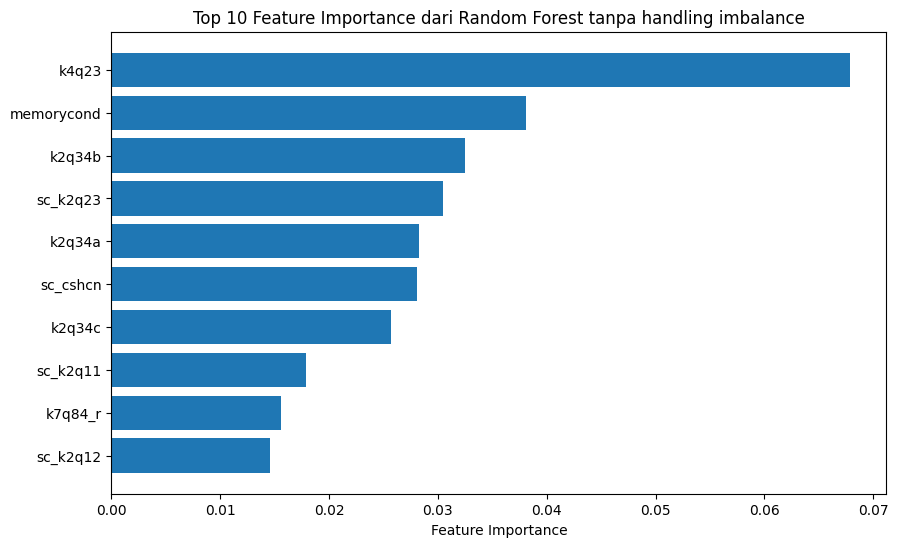

In [ ]:
feature_importances = bestrfr.feature_importances_

# Membuat DataFrame untuk kemudahan manipulasi
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Mengurutkan berdasarkan importance dan memilih 10 fitur teratas
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot fitur teratas
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(top_features)), top_features['Importance'], align='center')
plt.yticks(np.arange(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance dari Random Forest tanpa handling imbalance')
plt.gca().invert_yaxis()  # Membalik sumbu y agar fitur terpenting di atas
plt.show()